In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns


In [234]:
df=pd.read_csv('menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [236]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [237]:
df.describe

<bound method NDFrame.describe of                Category                                               Item  \
0             Breakfast                                       Egg McMuffin   
1             Breakfast                                  Egg White Delight   
2             Breakfast                                   Sausage McMuffin   
3             Breakfast                          Sausage McMuffin with Egg   
4             Breakfast                   Sausage McMuffin with Egg Whites   
..                  ...                                                ...   
255  Smoothies & Shakes                 McFlurry with Oreo Cookies (Small)   
256  Smoothies & Shakes                McFlurry with Oreo Cookies (Medium)   
257  Smoothies & Shakes                 McFlurry with Oreo Cookies (Snack)   
258  Smoothies & Shakes  McFlurry with Reese's Peanut Butter Cups (Medium)   
259  Smoothies & Shakes   McFlurry with Reese's Peanut Butter Cups (Snack)   

        Serving Size  Calorie

In [238]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
Category,9
Item,260
Serving Size,107
Calories,78
Calories from Fat,48
Total Fat,52
Total Fat (% Daily Value),63
Saturated Fat,26
Saturated Fat (% Daily Value),74
Trans Fat,5


In [239]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
Category,"[Breakfast, Beef & Pork, Chicken & Fish, Salad..."
Item,"[Egg McMuffin, Egg White Delight, Sausage McMu..."
Serving Size,"[4.8 oz (136 g), 4.8 oz (135 g), 3.9 oz (111 g..."
Calories,"[300, 250, 370, 450, 400, 430, 460, 520, 410, ..."
Calories from Fat,"[120, 70, 200, 250, 210, 230, 270, 180, 220, 2..."
Total Fat,"[13.0, 8.0, 23.0, 28.0, 26.0, 30.0, 20.0, 25.0..."
Total Fat (% Daily Value),"[20, 12, 35, 43, 36, 40, 47, 32, 38, 42, 48, 5..."
Saturated Fat,"[5.0, 3.0, 8.0, 10.0, 9.0, 13.0, 14.0, 11.0, 1..."
Saturated Fat (% Daily Value),"[25, 15, 42, 52, 46, 65, 68, 56, 59, 62, 71, 7..."
Trans Fat,"[0.0, 1.0, 0.5, 1.5, 2.5]"


In [240]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
255    False
256    False
257    False
258    False
259    False
Length: 260, dtype: bool

In [241]:
#df.columns
print(df['Serving Size'].dtype)

object


In [242]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [243]:
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Ensure the 'Serving Size' column is of string type
if 'Serving Size' in df.columns:
    df['Serving Size'] = df['Serving Size'].astype(str)

    # Extract numeric part from 'Serving Size'
    df['Serving Size (g)'] = df['Serving Size'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
else:
    raise KeyError("The column 'Serving Size' is not present in the dataset.")

# Apply one-hot encoding to 'Category' and 'Item' columns
df_encoded = pd.get_dummies(df, columns=['Category', 'Item'], drop_first=True)

# Drop the original 'Serving Size' column and keep 'Serving Size (g)'
df_encoded = df_encoded.drop(columns=['Serving Size'])





In [244]:
features = ['Category_Beverages', 'Category_Breakfast', 'Category_Chicken & Fish',
             'Category_Coffee & Tea', 'Category_Desserts', 'Category_Salads',
             'Category_Smoothies & Shakes', 'Category_Snacks & Sides',  # Example categories
             'Item_Apple Slices', 'Item_Bacon Buffalo Ranch McChicken',  # Example items
             # Add all other one-hot encoded item columns here
             'Serving Size (g)']  # Including the serving size

# Ensure these columns are present in df_encoded
missing_features = [feature for feature in features if feature not in df_encoded.columns]
if missing_features:
    raise KeyError(f"Columns missing from DataFrame: {missing_features}")

# Extract features and target variable
X = df_encoded[features]

# Define target variable
target_variable = 'Calories'  # Replace 'Calories' with your actual target variable name
if target_variable not in df_encoded.columns:
    raise KeyError(f"Target variable '{target_variable}' not found in DataFrame")

y = df_encoded[target_variable]

# Convert to arrays if needed
X = X.values
y = y.values

print(f'Number of rows in X: {X.shape[0]}')
print(f'Number of rows in y: {y.shape[0]}')

Number of rows in X: 260
Number of rows in y: 260


In [245]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size (g)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,4.8
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,4.8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,3.9
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,5.7
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,5.7


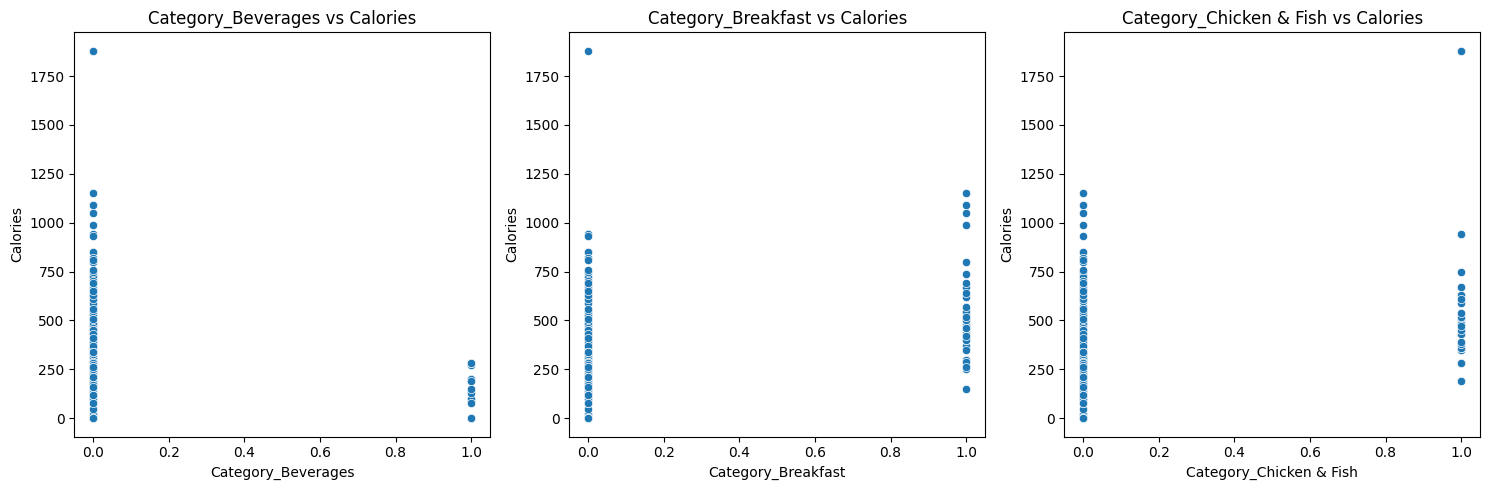

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are already defined as DataFrame or Series
# Convert X and y to DataFrame for easier plotting
X_df = pd.DataFrame(X, columns=features)
y_df = pd.Series(y, name=target_variable)

# Add the target variable to the DataFrame for plotting
df_plot = X_df.copy()
df_plot[target_variable] = y_df

# Define the subset of variables to plot
subset_X = X_df.columns[:3]  # e.g., first 3 independent variables
subset_y = [target_variable]  # Just one dependent variable

# Function to plot scatter plots for each pair of independent and dependent variables
def plot_scatter(df, x_var, y_var, ax):
    sns.scatterplot(data=df, x=x_var, y=y_var, ax=ax)
    ax.set_title(f'{x_var} vs {y_var}')
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)

# Number of columns in the plot grid
cols = 3

# Calculate the number of rows needed
rows = (len(subset_X) * len(subset_y) + cols - 1) // cols

# Adjust figure size to avoid being too large
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the array of axes

# Plot each independent variable with the dependent variable
plot_num = 0
for x_var in subset_X:
    for y_var in subset_y:
        plot_scatter(df_plot, x_var, y_var, axes[plot_num])
        plot_num += 1

# Remove any unused subplots
for i in range(plot_num, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [247]:
print("Columns in the DataFrame after encoding:", df.columns.tolist())


Columns in the DataFrame after encoding: ['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Serving Size (g)']


In [248]:
#X=df[['Category','Item','Serving Size']]
#y=df.drop(columns = ['Category','Item','Serving Size'])

In [249]:
import numpy as np
import pandas as pd

# Convert lists to DataFrames/Arrays
X = pd.DataFrame(X)
y = pd.Series(y)

# Check the shapes
print(f'Number of rows in X: {X.shape[0]}')
print(f'Number of rows in y: {y.shape[0]}')



Number of rows in X: 260
Number of rows in y: 260


In [250]:
print(f'Dataset shape before extraction: {df.shape}')
print(f'Number of rows in X after extraction: {X.shape[0]}')
print(f'Number of rows in y after extraction: {y.shape[0]}')


Dataset shape before extraction: (260, 25)
Number of rows in X after extraction: 260
Number of rows in y after extraction: 260


In [251]:
print("Index of X:")
print(X.index)

print("Index of y:")
print(y.index)

Index of X:
RangeIndex(start=0, stop=260, step=1)
Index of y:
RangeIndex(start=0, stop=260, step=1)


In [252]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Serving Size (g)'],
      dtype='object')

In [253]:
#import pandas as pd
#from sklearn.preprocessing import OneHotEncoder

# Assuming df is already defined and contains the necessary columns

# Print columns to verify
#print("Columns in DataFrame:", df.columns)

# Ensure that column names are correct
#missing_columns = ['Category', 'Item', 'Serving Size (g)']
#for col in missing_columns:
  #  if col not in df.columns:
 #       print(f"Column missing: {col}")

# Drop rows with missing values in relevant columns (use correct column names)
#df_clean = df.dropna(subset=['Category', 'Item', 'Serving Size (g)'])  # Ensure these column names match exactly

# Initialize OneHotEncoder and fit to 'Category' and 'Item' columns
#encoder = OneHotEncoder(sparse_output=False)
#encoded_features = encoder.fit_transform(df_clean[['Category', 'Item']])

# Combine encoded features with 'Serving Size (g)'
#encoded_feature_names = encoder.get_feature_names_out(['Category', 'Item'])
#encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate encoded features with the rest of the data
#df_clean.reset_index(drop=True, inplace=True)
#encoded_df.reset_index(drop=True, inplace=True)
#df_clean = pd.concat([encoded_df, df_clean[['Serving Size (g)']]], axis=1)

# Define feature columns
#feature_columns = list(encoded_feature_names) + ['Serving Size (g)']

# Ensure that all feature columns are present in df_clean
#missing_features = [col for col in feature_columns if col not in df_clean.columns]
#if missing_features:
 #   raise KeyError(f"Missing columns in df_clean: {missing_features}")

# Extract features and target
#X = df_clean[feature_columns]

# Define target columns as the rest of the dataset (ensure target is defined correctly)
#target_columns = df_clean.columns.difference(feature_columns)
#y = df_clean[target_columns]

# Convert to arrays if needed
#X = X.values
#y = y.values

#print(f'Number of rows in X after cleaning: {X.shape[0]}')
#print(f'Number of rows in y after cleaning: {y.shape[0]}')

#print("First few rows of X:")
##print(pd.DataFrame(X, columns=feature_columns).head())

#print("First few rows of y:")
#print(pd.DataFrame(y, columns=target_columns).head())



In [254]:
#import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Print columns to verify
#print("Columns in DataFrame:", df.columns)

# Ensure that column names are correct
# For example, if column names are different, update as needed
#missing_columns = ['Category', 'Item', 'Serving Size (g)']
#for col in missing_columns:
    #if col not in df.columns:
        #print(f"Column missing: {col}")

# Drop rows with missing values in relevant columns (use correct column names)
#df_clean = df.dropna(subset=['Category', 'Item', 'Serving Size (g)'])  # Ensure these column names match exactly

# Define feature columns
#feature_columns = encoder.get_feature_names_out(['Category', 'Item']) + ['Serving Size (g)']

# Ensure that all feature columns are present in df_clean
#missing_features = [col for col in feature_columns if col not in df_clean.columns]
#if missing_features:
    #raise KeyError(f"Missing columns in df_clean: {missing_features}")

# Extract features and target
#X = df_clean[feature_columns]

# Define target columns as the rest of the dataset (ensure target is defined correctly)
#target_columns = df_clean.columns.difference(feature_columns)
#y = df_clean[target_columns]

# Convert to arrays if needed
#X = X.values
#y = y.values

#print(f'Number of rows in X after cleaning: {X.shape[0]}')
#print(f'Number of rows in y after cleaning: {y.shape[0]}')

#print("First few rows of X:")
#print(pd.DataFrame(X, columns=feature_columns).head())

#print("First few rows of y:")
#print(pd.DataFrame(y, columns=target_columns).head())




In [255]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Assuming df is already defined and contains the necessary columns

# Print columns to verify
print("Columns in DataFrame:", df.columns)

# Ensure that column names are correct
missing_columns = ['Category', 'Item', 'Serving Size (g)']
for col in missing_columns:
    if col not in df.columns:
        print(f"Column missing: {col}")

# Drop rows with missing values in relevant columns (use correct column names)
df_clean = df.dropna(subset=['Category', 'Item', 'Serving Size (g)'])  # Ensure these column names match exactly

# Initialize OneHotEncoder and fit to 'Category' and 'Item' columns
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_clean[['Category', 'Item']])

# Combine encoded features with 'Serving Size (g)'
encoded_feature_names = encoder.get_feature_names_out(['Category', 'Item'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate encoded features with the rest of the data
df_clean.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df_clean = pd.concat([encoded_df, df_clean[['Serving Size (g)']]], axis=1)

# Define feature columns
feature_columns = list(encoded_feature_names) + ['Serving Size (g)']

# Ensure that all feature columns are present in df_clean
missing_features = [col for col in feature_columns if col not in df_clean.columns]
if missing_features:
    raise KeyError(f"Missing columns in df_clean: {missing_features}")

# Extract features and target
X = df_clean[feature_columns]

# Define target columns as the rest of the dataset (ensure target is defined correctly)
target_columns = df_clean.columns.difference(feature_columns)
y = df_clean[target_columns]

# Verify that X and y have the same number of rows
assert X.shape[0] == y.shape[0], "X and y have different number of rows"

# Convert to arrays if needed
X = X.values
y = y.values

print(f'Number of rows in X after cleaning: {X.shape[0]}')
print(f'Number of rows in y after cleaning: {y.shape[0]}')

print("First few rows of X:")
print(pd.DataFrame(X, columns=feature_columns).head())

print("First few rows of y:")
print(pd.DataFrame(y, columns=target_columns).head())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

# Define models
models = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=42)),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=0.1))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    
    # Print train and test accuracy
    acc_train = (model.score(X_train, y_train) * 100)
    print(f'The accuracy of the {name} Model Train is {acc_train:.2f}')
    acc_test = (model.score(X_test, y_test) * 100)
    print(f'The accuracy of the {name} Model Test is {acc_test:.2f}')
    
    # Plot Actual vs Predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, s=10, color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)
    plt.show()

# Create a DataFrame with the results
dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])

# Highlight best and worst performing models
df_styled_best = dff.style.highlight_max(subset=['Accuracy', 'R2_score'], color='green') \
                        .highlight_min(subset=['MSE'], color='green') \
                        .highlight_max(subset=['MSE'], color='red') \
                        .highlight_min(subset=['Accuracy', 'R2_score'], color='red')

# Display the styled DataFrame
df_styled_best


Columns in DataFrame: Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Serving Size (g)'],
      dtype='object')
Number of rows in X after cleaning: 260
Number of rows in y after cleaning: 260
First few rows of X:
   Category_Beef & Pork  Category_Beverages  Category_Breakfast  \
0                   0.0                 0.0                 1.0   
1                   0.0                 0.0                 1.0   
2                   0.0                 0.0                 1.0   
3                   0.0 

ValueError: Found array with 0 feature(s) (shape=(208, 0)) while a minimum of 1 is required by RandomForestRegressor.